In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#import sys

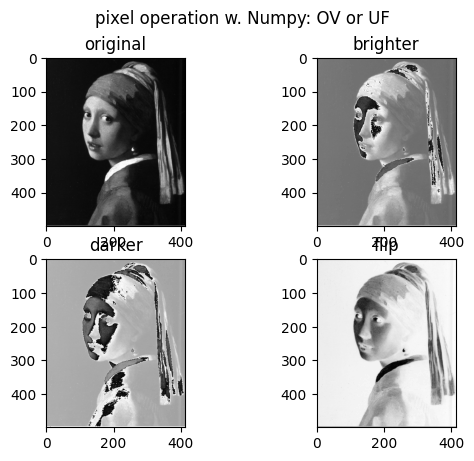

In [2]:
img1 = cv2.imread('perlgirl.jpg', cv2.IMREAD_GRAYSCALE) # rgb to gray 

# 1. direct pixel operation with numpy : care!

delta = 100
img_brighter = img1 + delta
img_darker   = img1 - delta
img_flip     = 255 - img1

plt.subplot(2,2,1), plt.imshow(img1, cmap='gray'), plt.title('original')
plt.subplot(2,2,2), plt.imshow(img_brighter, cmap='gray'), plt.title('brighter')
plt.subplot(2,2,3), plt.imshow(img_darker, cmap='gray'), plt.title('darker')
plt.subplot(2,2,4), plt.imshow(img_flip, cmap='gray'), plt.title('flip')

plt.suptitle('pixel operation w. Numpy: OV or UF') 
plt.show()


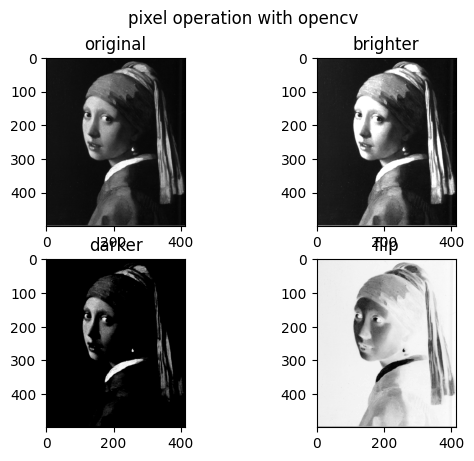

In [3]:
img_brighter = cv2.add(img1, delta)
img_darker   = cv2.subtract(img1, delta)
img_flip     = cv2.subtract(255, img1)

plt.subplot(2,2,1), plt.imshow(img1, cmap='gray'), plt.title('original')
plt.subplot(2,2,2), plt.imshow(img_brighter, cmap='gray'), plt.title('brighter')
plt.subplot(2,2,3), plt.imshow(img_darker, cmap='gray'), plt.title('darker')
plt.subplot(2,2,4), plt.imshow(img_flip, cmap='gray'), plt.title('flip')

plt.suptitle('pixel operation with opencv') 
plt.show()


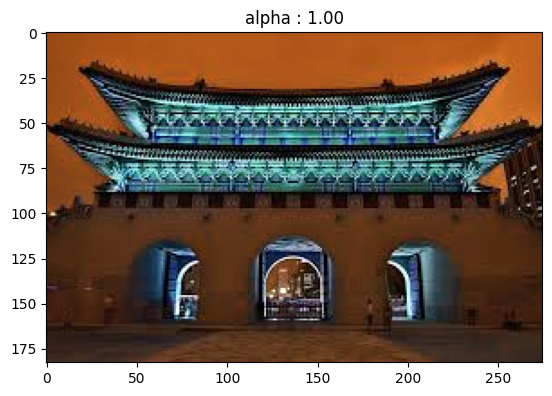

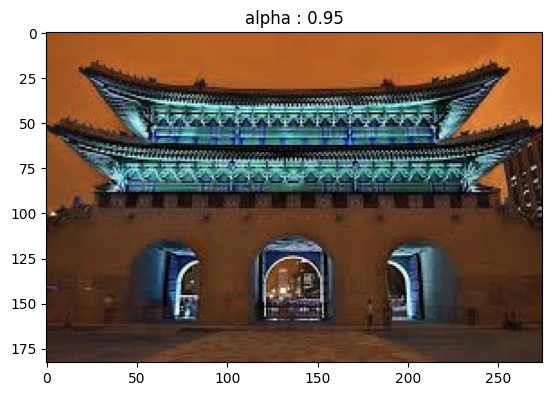

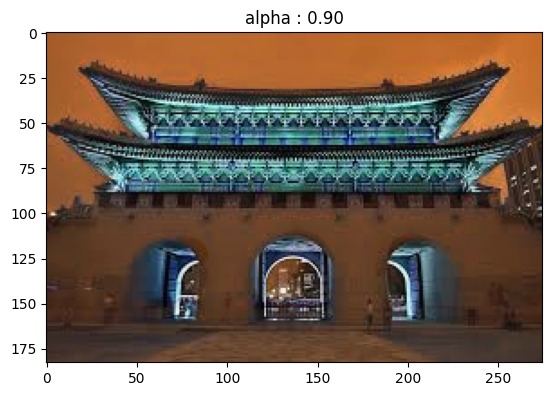

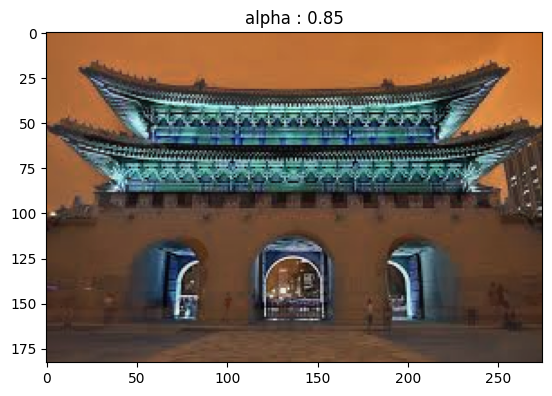

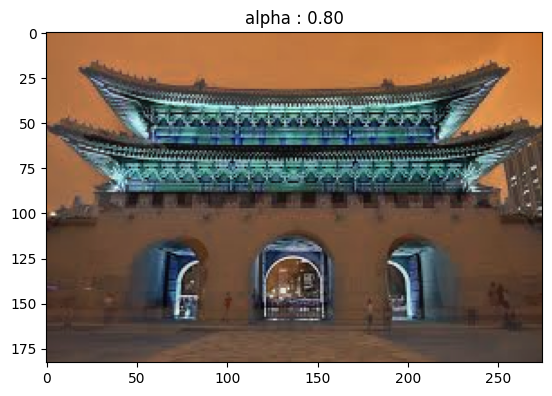

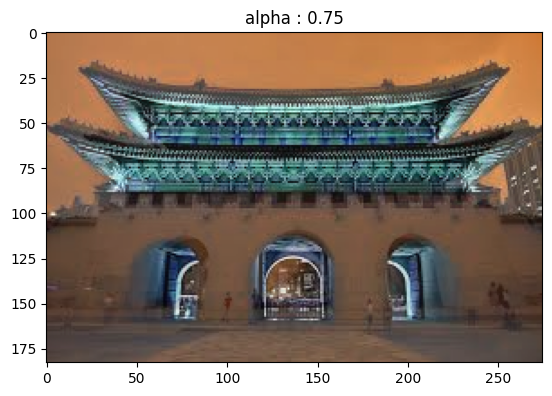

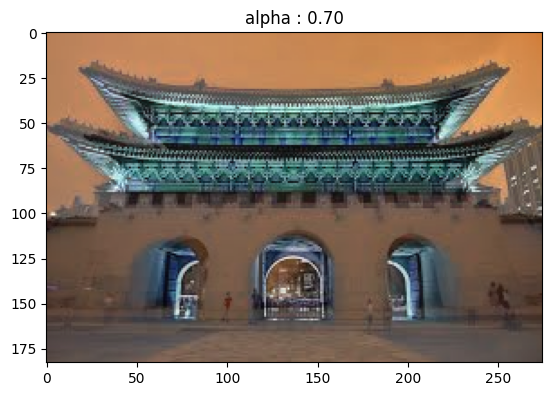

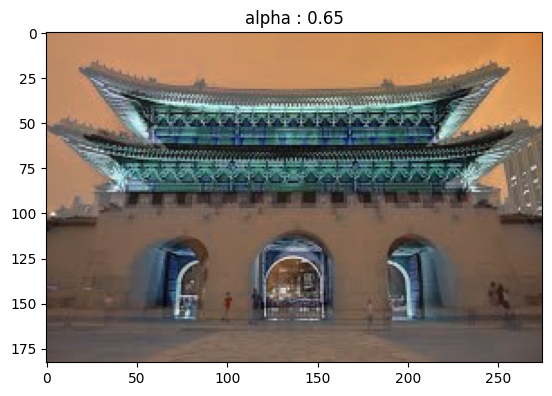

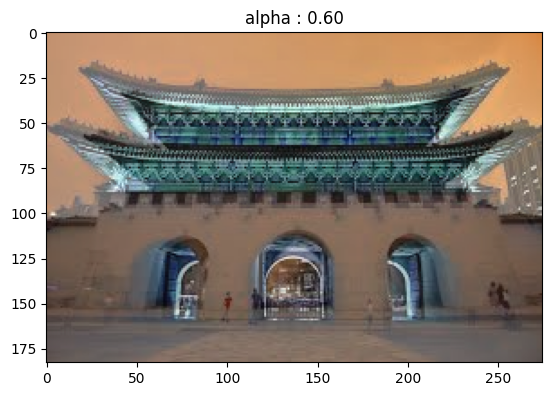

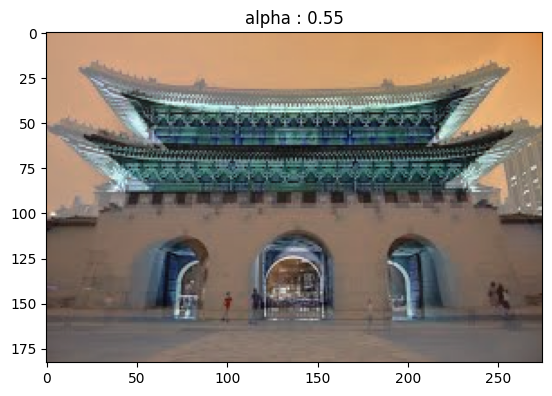

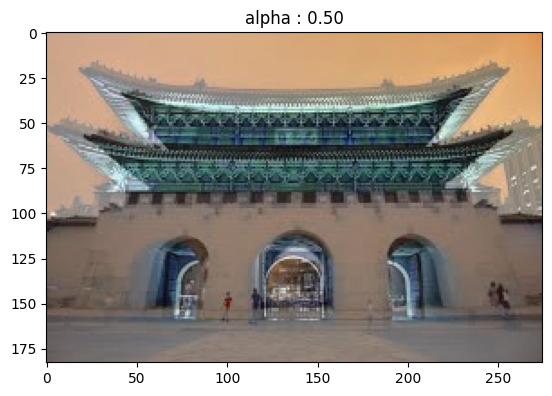

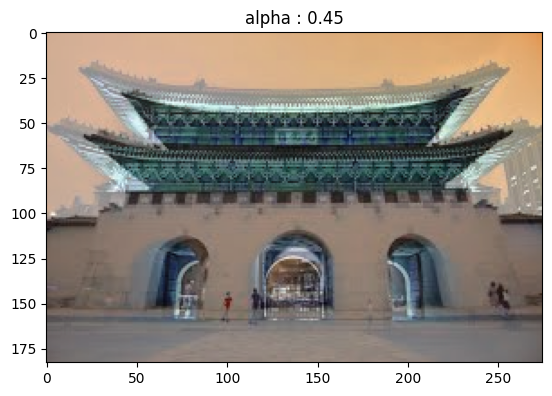

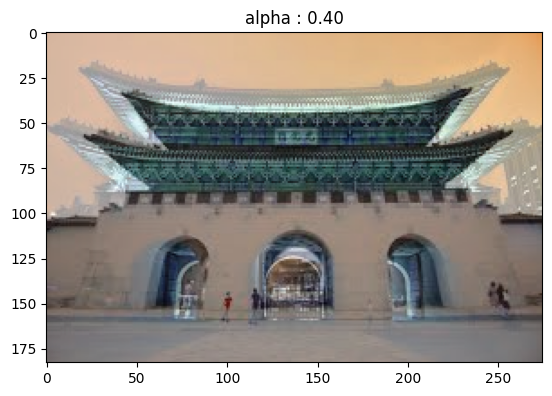

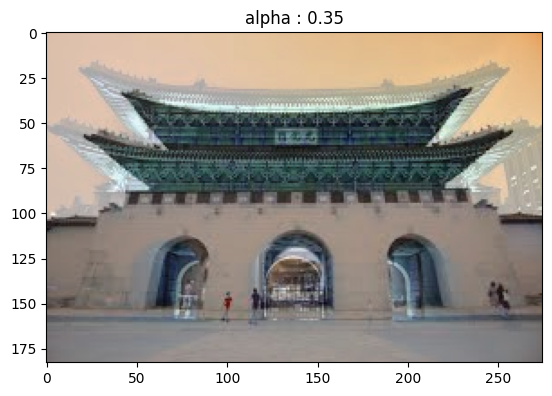

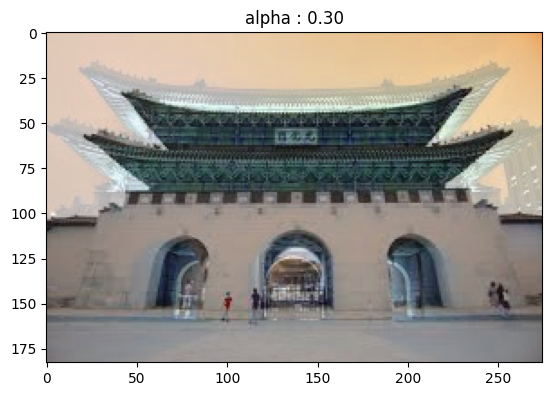

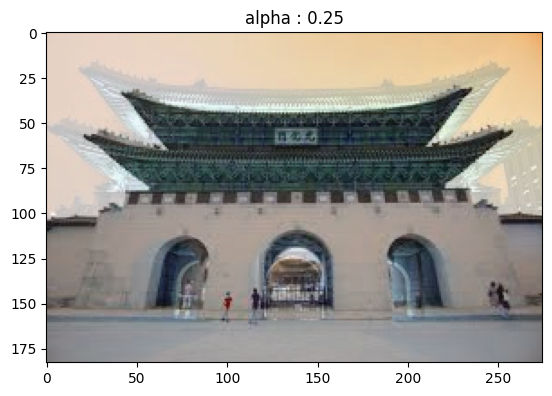

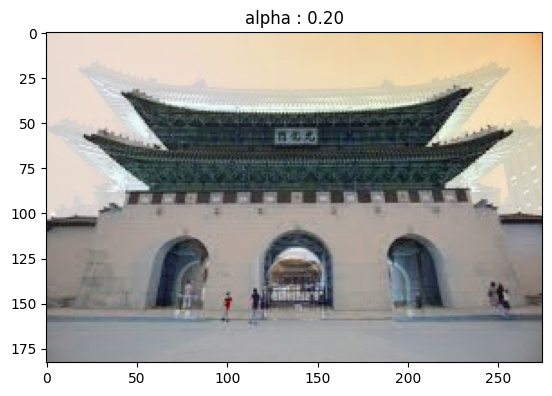

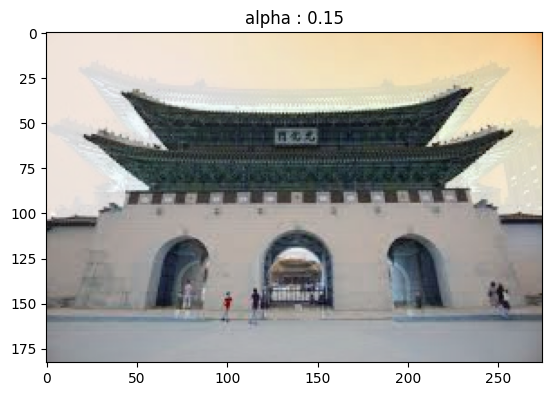

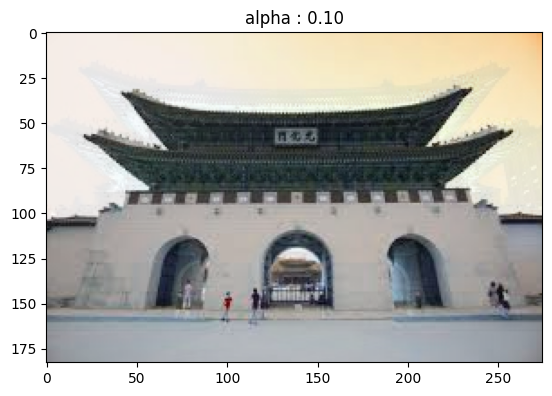

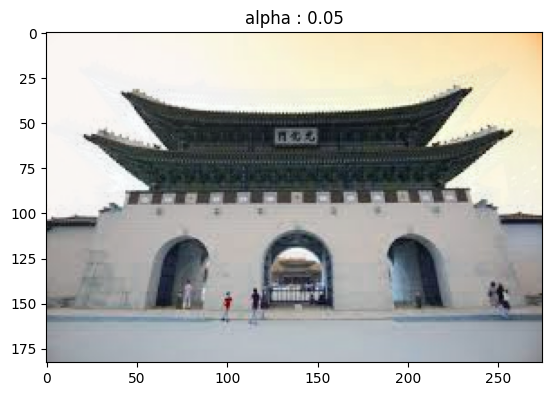

In [5]:
def demo_alpha_blending():
    plt.ion() # making the plt non-blocking mode

    img_day = cv2.imread('palaceday.jpg') 
    img_night = cv2.imread('palacenight.jpg') 

    for n in range(20):

        #dst = src1*alpha + src2*beta + gamma;
        alpha = 1. - n/20.
        img_blended = cv2.addWeighted(img_day,1. - alpha, img_night, alpha , 0)
        plt.imshow(img_blended)
        plt.title("alpha : %.2f"%(alpha))
        plt.show()
        plt.pause(3.01)
        
demo_alpha_blending()        

#필터 만들기

In [6]:
###########################################################################
# How to use filter2D
###########################################################################
img = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)

#averaging filter 
ksize = 10
kernel = np.ones((ksize,ksize),np.float32)/(ksize*ksize)
img_box = cv2.filter2D(img,-1,kernel)
print(kernel)    

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


(<matplotlib.image.AxesImage at 0x156b4710d90>,
 Text(0.5, 1.0, 'Original'),
 (-0.5, 511.5, 511.5, -0.5))

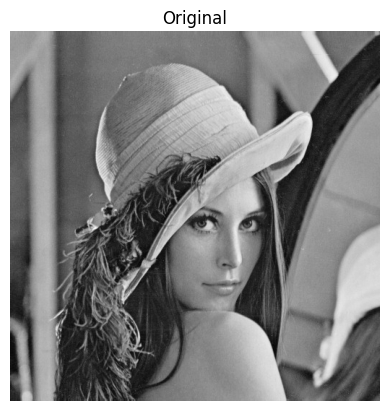

In [7]:
plt.imshow(img, cmap='gray'),plt.title('Original'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x156b4675ea0>,
 Text(0.5, 1.0, 'box u filter2D'),
 (-0.5, 511.5, 511.5, -0.5))

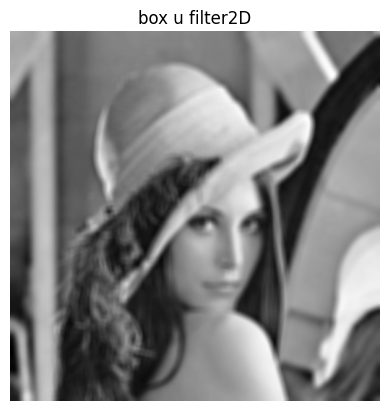

In [8]:
 plt.imshow(img_box, cmap='gray'),plt.title('box u filter2D'), plt.axis('off')
  

In [9]:
#gaussian filter 
ksize = 31
sigma = 10
#kernel = np.ones((ksize,ksize),np.float32)/(ksize*ksize)
img_g1 = cv2.GaussianBlur(img,(ksize,ksize),sigma)

kernel_1d = cv2.getGaussianKernel(ksize = ksize, sigma = sigma)
print(kernel_1d)
kernel = np.outer(kernel_1d, kernel_1d.transpose())
print(kernel)
img_g2 = cv2.filter2D(img,-1,kernel)


[[0.01473443]
 [0.01703358]
 [0.01949556]
 [0.02209136]
 [0.02478371]
 [0.02752753]
 [0.03027089]
 [0.03295644]
 [0.03552322]
 [0.03790893]
 [0.04005232]
 [0.04189584]
 [0.04338816]
 [0.04448654]
 [0.04515887]
 [0.04538523]
 [0.04515887]
 [0.04448654]
 [0.04338816]
 [0.04189584]
 [0.04005232]
 [0.03790893]
 [0.03552322]
 [0.03295644]
 [0.03027089]
 [0.02752753]
 [0.02478371]
 [0.02209136]
 [0.01949556]
 [0.01703358]
 [0.01473443]]
[[0.0002171  0.00025098 0.00028726 0.0003255  0.00036517 0.0004056
  0.00044602 0.00048559 0.00052341 0.00055857 0.00059015 0.00061731
  0.0006393  0.00065548 0.00066539 0.00066873 0.00066539 0.00065548
  0.0006393  0.00061731 0.00059015 0.00055857 0.00052341 0.00048559
  0.00044602 0.0004056  0.00036517 0.0003255  0.00028726 0.00025098
  0.0002171 ]
 [0.00025098 0.00029014 0.00033208 0.00037629 0.00042216 0.00046889
  0.00051562 0.00056137 0.00060509 0.00064572 0.00068223 0.00071364
  0.00073906 0.00075776 0.00076922 0.00077307 0.00076922 0.00075776
  0.0007

(<Axes: title={'center': 'gauss u. filter2D'}>,
 Text(0.5, 1.0, 'gauss u. filter2D'),
 (-0.5, 511.5, 511.5, -0.5))

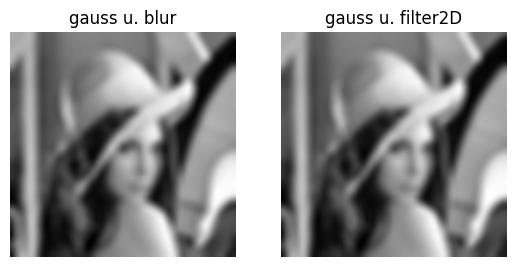

In [10]:


plt.subplot(1,2,1),plt.imshow(img_g1, cmap='gray'),plt.title('gauss u. blur'), plt.axis('off')
plt.subplot(1,2,2),plt.imshow(img_g2, cmap='gray'),plt.title('gauss u. filter2D'), plt.axis('off')


(<matplotlib.image.AxesImage at 0x156b4588130>,
 Text(0.5, 1.0, 'S&P noise'),
 (-0.5, 511.5, 511.5, -0.5))

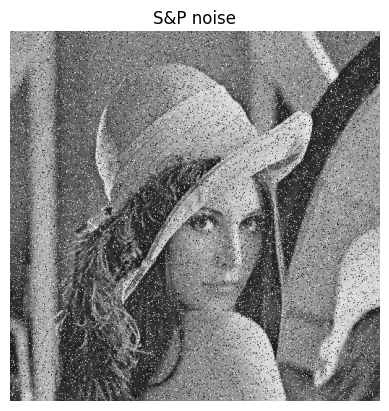

In [11]:
###########################################################################
# Denoising 
#
########################################################################### 
img = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)

# add salt noise 
noise_level = 0.05
img_noise = img.copy()

num_noise = noise_level*img.shape[0]*img.shape[1]
coords_x = [np.random.randint(0, img.shape[1] - 1, int(num_noise))] 
coords_y = [np.random.randint(0, img.shape[0] - 1, int(num_noise))] 
img_noise[coords_y, coords_x]  = 255 # white salt

coords_x = [np.random.randint(0, img.shape[1] - 1, int(num_noise))] 
coords_y = [np.random.randint(0, img.shape[0] - 1, int(num_noise))] 
img_noise[coords_y, coords_x]  = 0 # white pepper

    
plt.imshow(img_noise,  cmap='gray'),plt.title('S&P noise'), plt.axis('off')

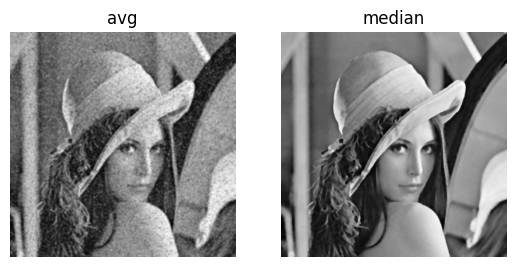

In [12]:
blur_gauss = cv2.GaussianBlur(img_noise,(5,5),2.0)
blur_median = cv2.medianBlur(img_noise,5)
#blur_bilateral = cv2.bilateralFilter(img,9,75,75)   

plt.subplot(1,2,1),plt.imshow(blur_gauss,  cmap='gray'),plt.title('avg'),plt.axis('off')
plt.subplot(1,2,2),plt.imshow(blur_median,  cmap='gray'),plt.title('median'),plt.axis('off')
plt.show()

(512, 512, 3)


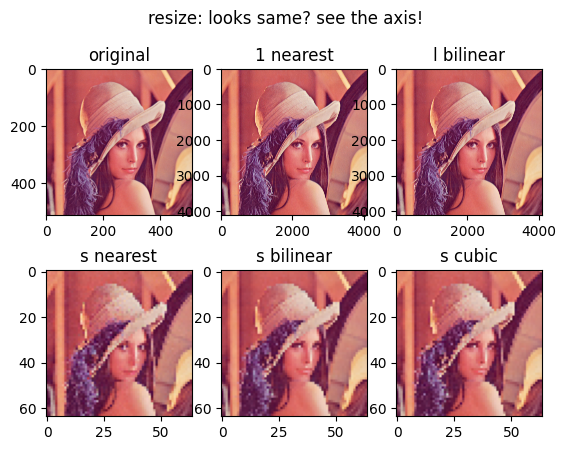

In [4]:
img = cv2.imread('Lena.png')
print(img.shape)

#  크게 
width = int(img.shape[1]*8 )
height = int(img.shape[0]*8)
dim = (width, height)  # Note:  width-height so shape[1] and shape[0]. ^^;;
img_large_nearest = cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST) 
img_large_bilinear = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR) 

# 작게 
width = int(img.shape[1]//8 )
height = int(img.shape[0]//8)
dim = (width, height)  # Note:  width-height so shape[1] and shape[0]. ^^;;
img_small_nearest = cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST) 
img_small_bilinear = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR) 
img_small_cubic = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC) 


plt.subplot(2,3,1),plt.imshow(img[:,:,::-1]),plt.title('original')
plt.subplot(2,3,2),plt.imshow(img_large_nearest[:,:,::-1]),plt.title('1 nearest')
plt.subplot(2,3,3),plt.imshow(img_large_bilinear[:,:,::-1]),plt.title('l bilinear')
plt.subplot(2,3,4),plt.imshow(img_small_nearest[:,:,::-1]),plt.title('s nearest')
plt.subplot(2,3,5),plt.imshow(img_small_bilinear[:,:,::-1]),plt.title('s bilinear')
plt.subplot(2,3,6),plt.imshow(img_small_cubic[:,:,::-1]),plt.title('s cubic')
plt.suptitle('resize: looks same? see the axis!')
plt.show()


M1: [[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]
M2: [[  0.96592583  -0.25881905  74.98066402]
 [  0.25881905   0.96592583 -57.53468708]]


(<matplotlib.image.AxesImage at 0x1b39138a5f0>, Text(0.5, 1.0, 'dst2'))

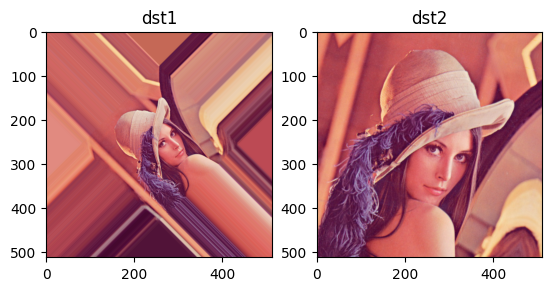

In [6]:
 # by defining matrix 
src = cv2.imread('Lena.png')

h, w, channels = src.shape
M1 = cv2.getRotationMatrix2D( (w/2, h/2),  45, 0.5 )  # center, rotation, scale 
M2 = cv2.getRotationMatrix2D( (w/2, h/2), -15, 1.0 )  # center, rotation, scale 

print("M1:", M1)
print("M2:", M2)

dst1 = cv2.warpAffine( src, M1, (w, h), borderMode = cv2.BORDER_REPLICATE)
dst2 = cv2.warpAffine( src, M2, (w, h), borderMode = cv2.BORDER_REFLECT)

plt.subplot(1,2,1)
plt.imshow(dst1[:,:,::-1]), plt.title('dst1')
plt.subplot(1,2,2)
plt.imshow(dst2[:,:,::-1]), plt.title('dst2')


[[  1.    0.    0. ]
 [ -0.5   1.  300. ]]


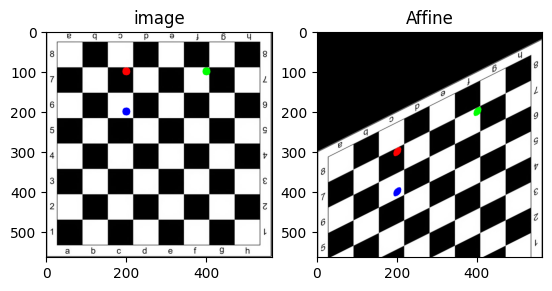

In [7]:
# by estimating matrix from 3 points 
img = cv2.imread('chessboard.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (200,100), 10, (255,0,0),-1)
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

M = cv2.getAffineTransform(pts1, pts2)
print(M)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

[[-1.50420572e+00 -1.21193145e+00  1.71965717e+03]
 [-1.00869881e-02 -3.30429892e+00  3.06526591e+03]
 [ 3.56952975e-05 -2.28129528e-03  1.00000000e+00]]


(<Axes: title={'center': 'Perspective'}>,
 Text(0.5, 1.0, 'Perspective'))

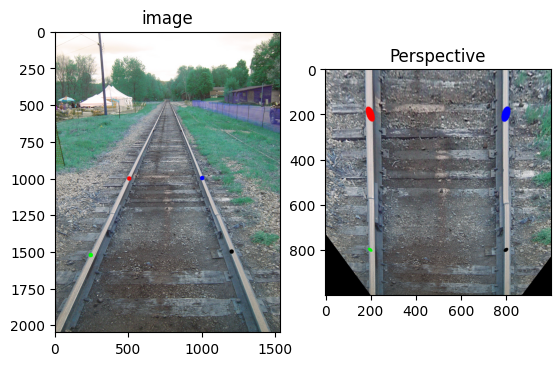

In [8]:
img = cv2.imread('perspective.jpg')
# [x,y] 좌표점을 4x2의 행렬로 작성

# 1. 이동 점 
# 좌표의 이동전의 점:  좌상->좌하->우상->우하
pts1 = np.float32([[504,1003],[243,1525],[1000,1000],[1200,1500]])
# 좌표의 이동후의 점
pts2 = np.float32([[200,200],[200,800],[800,200],[800,800]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (504,1003), 15, (255,0,0),-1)
cv2.circle(img, (243,1524), 15, (0,255,0),-1)
cv2.circle(img, (1000,1000), 15, (0,0,255),-1)
cv2.circle(img, (1200,1500), 15, (0,0,0),-1)

cv2.imwrite("p1.png", img) # save 

# 2. 메트릭스 계산 
M = cv2.getPerspectiveTransform(pts1, pts2)  # matrix 계산 
print(M)

dst = cv2.warpPerspective(img, M, (1000,1000))
cv2.imwrite("p2.png", dst) # save 


plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')